In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 50

In [2]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
numerical = df.select_dtypes(int)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
numerical[['customer_lifetime_value']].describe()

,customer_lifetime_value
count,10689.000000
mean,8011.906727
std,6877.557889
min,1898.000000
25%,4014.000000
50%,5776.000000
75%,8991.000000
max,83325.000000


## Activity 6

### Remove the outliers from the numerical columns

In [6]:
#looking for outliers with some boxplot

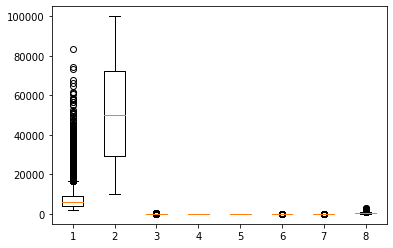

In [7]:
plt.boxplot(numerical)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ba5407d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ba54174f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ba5407a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ba5417c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ba5417fa0>],
 'means': []}

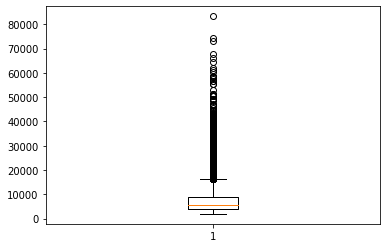

In [8]:
plt.boxplot(numerical['customer_lifetime_value']) #1

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ba54a5550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ba54a5400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ba54b0970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ba5519640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ba5519160>],
 'means': []}

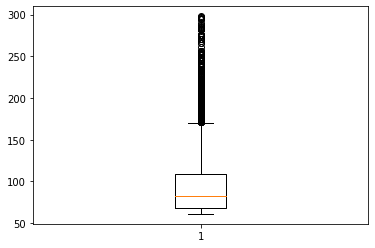

In [9]:
plt.boxplot(numerical['monthly_premium_auto']) #3

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ba5d131f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ba5d13910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ba5d0ee20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ba54e3070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ba54e3400>],
 'means': []}

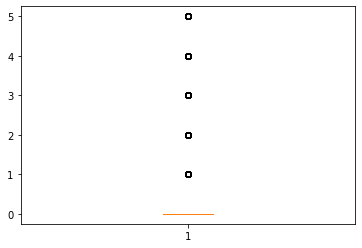

In [10]:
plt.boxplot(numerical['number_of_open_complaints']) #6

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ba5544bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ba5535250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ba5544820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ba5535d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ba55351f0>],
 'means': []}

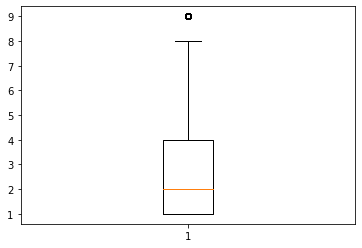

In [11]:
plt.boxplot(numerical['number_of_policies']) #7

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ba53369d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ba5346130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ba5336640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ba5346850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ba5346be0>],
 'means': []}

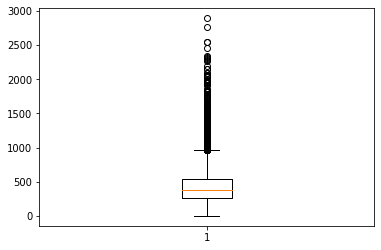

In [12]:
plt.boxplot(numerical['total_claim_amount']) #8

In [13]:
#I decide to remove outliers on columns 1,3,8, where there are a lot

In [14]:
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
def remove_outliers(df):
    pct_75 = pct(df, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    pct_25 = pct(df, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    upper_bound = pct_75 + 1.5*iqr(df)  # iqr - > Scipy function to calculate the Interquartile Range
    lower_bound = pct_25 - 1.5*iqr(df)
    df = df[(df <= upper_bound) & (df >= lower_bound)]  # Filter out the outliers
    return df

In [15]:
numerical['customer_lifetime_value'] = remove_outliers(numerical['customer_lifetime_value'])

<ipython-input-15-5b0e9664e508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['customer_lifetime_value'] = remove_outliers(numerical['customer_lifetime_value'])


In [16]:
numerical['monthly_premium_auto'] = remove_outliers(numerical['monthly_premium_auto'])

<ipython-input-16-21048ed08c10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['monthly_premium_auto'] = remove_outliers(numerical['monthly_premium_auto'])


In [17]:
numerical['total_claim_amount'] = remove_outliers(numerical['total_claim_amount'])

<ipython-input-17-215dd1a3adde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['total_claim_amount'] = remove_outliers(numerical['total_claim_amount'])


In [18]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61.0,7,52,0,9,292.0
1,2228.0,26794,64.0,3,26,0,1,744.0
2,14947.0,22139,100.0,34,31,0,2,480.0
3,NaN,49078,97.0,10,3,0,2,484.0
4,9025.0,23675,117.0,15,31,1,7,707.0
...,...,...,...,...,...,...,...,...
10684,15563.0,64811,NaN,8,40,2,7,NaN
10685,5259.0,61146,65.0,7,68,0,6,273.0
10686,NaN,39837,NaN,11,63,0,2,381.0
10687,11971.0,64195,158.0,0,27,4,6,618.0


In [19]:
round(numerical.isna().sum()/len(numerical),4)*100 

customer_lifetime_value          8.99
income                           0.00
monthly_premium_auto             4.74
months_since_last_claim          0.00
months_since_policy_inception    0.00
number_of_open_complaints        0.00
number_of_policies               0.00
total_claim_amount               5.01
dtype: float64

In [ ]:
#As we have removed some outliers, now we have some NaN

In [ ]:
#replace Nan with mean values

In [28]:
numerical["customer_lifetime_value"] = numerical["customer_lifetime_value"].fillna(numerical["customer_lifetime_value"].mean())
numerical["monthly_premium_auto"] = numerical["monthly_premium_auto"].fillna(numerical["monthly_premium_auto"].mean())
numerical["total_claim_amount"] = numerical["total_claim_amount"].fillna(numerical["total_claim_amount"].mean())

<ipython-input-28-61d6df3dcdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["customer_lifetime_value"] = numerical["customer_lifetime_value"].fillna(numerical["customer_lifetime_value"].mean())
<ipython-input-28-61d6df3dcdb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["monthly_premium_auto"] = numerical["monthly_premium_auto"].fillna(numerical["monthly_premium_auto"].mean())
<ipython-input-28-61d6df3dcdb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [29]:
round(numerical.isna().sum()/len(numerical),4)*100 

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
customer_lifetime_value          0.0
total_claim_amount               0.0
dtype: float64

In [ ]:
#We don't have more NaNs!

### X-y split (y is the target variable which is the total claim amount)

In [20]:
## Should I concatenate categorical and numerical or work with original df?

In [21]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

<b>Data Splitting

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

NameError: name 'train_test_split' is not defined